## Exercise 5
### Index No: 190696U
### Name: Wijegunawardana C.H.W.

1. Construct the scale-normalized Laplacian of Gaussian (LoG) with σ = 10. Choose the
window size appropriately. Show this LoG as an image.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

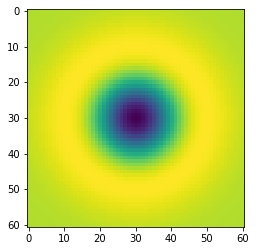

In [3]:
sigma = 10
hw = 3*sigma

X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))

log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + (Y**2/sigma**2) - 2)*np.exp(-(X**2+Y**2)/(2*sigma**2))

plt.imshow(log)

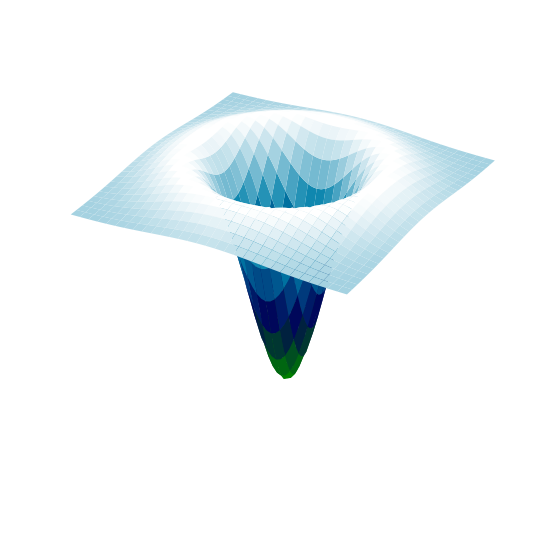

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

2. Filter a 71×71 image of a black circle of radius r = 14 with a series of LoG kernels
with σ ∈ [5,15] and find the scale-space extremum. Justify your answer

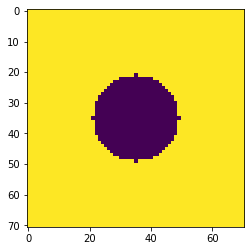

In [5]:
# generating the circle
[w,h] = [71,71]
[hw, hh] = [w//2, h//2]
f = np.ones((h,w),dtype = np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5;
f *= X**2 + Y**2 > r**2
plt.imshow(f)

(35, 35, 5)
10


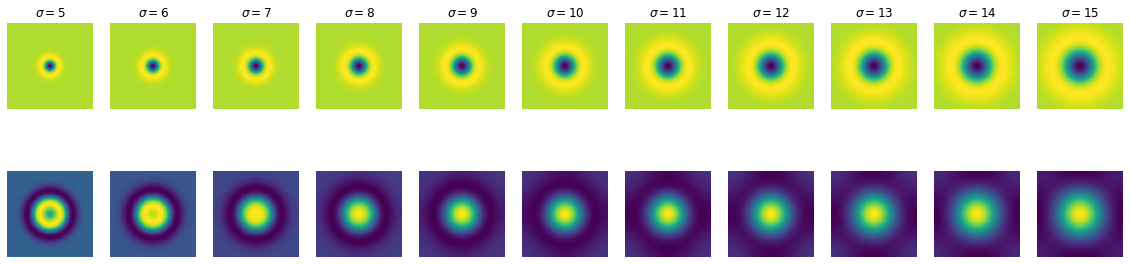

In [6]:
s = 11
fig, ax = plt.subplots(2,s, figsize = (20,5))

scale_space = np.empty((h, w, s), dtype = np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + (Y**2/sigma**2) - 2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])

3. Match SIFT features between two images in the Graffiti sequence https://www.robots.ox.ac.uk/ vgg/data/affine/.

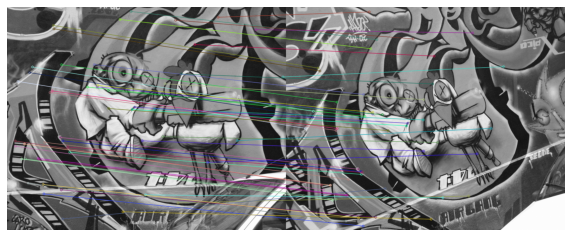

In [10]:
#reading image
img1 = cv.imread('graf/img1.ppm')  
img2 = cv.imread('graf/img2.ppm')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#keypoints
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags = 2)
plt.imshow(img3)
plt.show()

4. The following is a code snippet to generate a noisy line. Use least-squares line fitting
to fit a line.

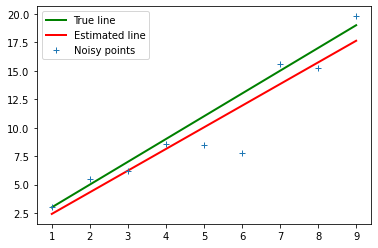

In [11]:
#least Square Line Fitting

m = 2 # Line equa t ion : y = m*x + c . m i s the s l o p e . c i s the i n t e r c e p t .
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
noise = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
# o [=1] = 20
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0],x[-1]],[m*x[0] + c, m*x[-1] + c],color = 'g', linewidth = 2, label = r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar, mstar*x[-1] + cstar],color = 'r', linewidth = 2, label = r'Estimated line')
plt.plot(x,y, '+', label = 'Noisy points')
plt.legend()

5. Use total least squares to fit a line. Experiment with high values of the gradient m.


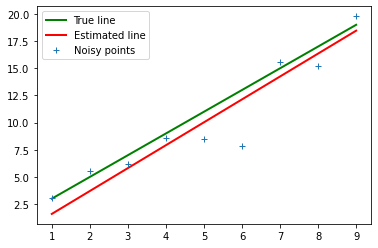

In [12]:
m = 2 # Line equa t ion : y = m*x + c . m i s the s l o p e . c i s the i n t e r c e p t .
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
noise = 2.*np.random.randn(len(x))
o = np.zeros(x.shape)
# o [=1] = 20
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W, V = np.linalg.eig(U)
ev_for_smallest = V[:, np.argmin(W)]

a = ev_for_smallest[0]
b = ev_for_smallest[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot([x[0],x[-1]],[m*x[0] + c, m*x[-1] + c],color = 'g', linewidth = 2, label = r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar, mstar*x[-1] + cstar],color = 'r', linewidth = 2, label = r'Estimated line')
plt.plot(x,y, '+', label = 'Noisy points')
plt.legend()